In [1]:
%matplotlib inline
import numpy as np
import pylab as pl
from orcs.process import SpectralCube
import orb.utils.io as io

In [2]:
cube = SpectralCube("/reductions/sitelle/Abell2261/Abell2261_C1.merged.cm1.1.0.hdf5")
#io.write_fits("deep.fits", cube.get_deep_frame(), overwrite=True)

INFO| Data shape : (2048, 2064, 279)
WARNING| orcs/core.py:110: UserWarning: FLAMBDA keyword not in cube header. Flux calibration may be bad.
  warnings.warn('FLAMBDA keyword not in cube header. Flux calibration may be bad.')

INFO| Cube is in WAVENUMBER (cm-1)
INFO| Cube is CALIBRATED in wavenumber


INFO| Number of integrated pixels: 2821


 [==========] [100%] [completed in 0.026 s]                                   


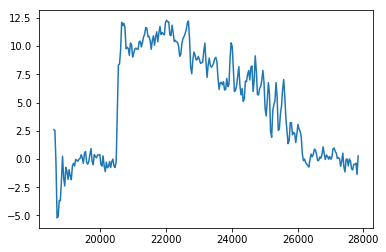

In [3]:
axis, spectrum = cube.extract_spectrum(1086, 1004, 30)
pl.plot(axis, spectrum)

INFO> Number of integrated pixels: 29


 [==========] [100%] [completed in 0.014 s]                                   
[[2(22)e-15 1.5406231162898649e-15 15244.68001448347 11.014410200525985 nan]
 [2(22)e-15 1.5406231163405194e-16 15210.370889748005 11.014410200525985
  nan]
 [2(22)e-15 4.621869348869595e-15 15162.753356579371 11.014410200525985 nan]
 [2(22)e-15 1.5406231163640916e-15 15234.06557757046 11.014410200525985 nan]
 [2(22)e-15 1.540623116345922e-16 15199.780341302294 11.014410200525985 nan]
 [2(22)e-15 4.621869349092275e-15 15152.19596286707 11.014410200525985 nan]]
[[1(305)e-16 3.383931320723722e-16 2.0237343371778236 0.0 nan]
 [1(305)e-16 3.383931423168052e-17 2.019179793970639 0.0 nan]
 [1(305)e-16 1.0151793962171173e-15 2.0128585568680224 0.0 nan]
 [1(305)e-16 3.383930816438804e-16 2.0214046150019374 0.0 nan]
 [1(305)e-16 3.3839313223217385e-17 2.016855314983108 0.0 nan]
 [1(305)e-16 1.0151792449316418e-15 2.0105413548861666 0.0 nan]]
[[2(22)e-15 1.525457691916818e-15 15244.51760521404 11.014410200525985 nan]


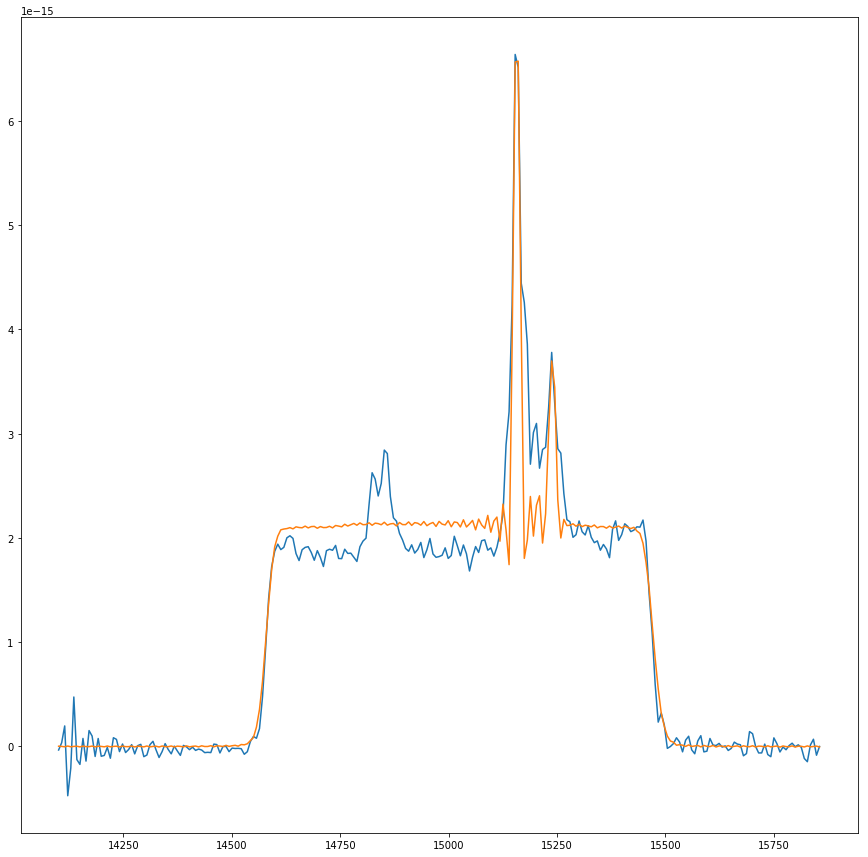

In [61]:
import gvar
vel1 = gvar.gvar(500,400)
vel2 = gvar.gvar(600,400)
vel3 = gvar.gvar(550,400)
amp1 = gvar.gvar(1,1000)
amp2 = gvar.gvar(3,1000)
amp3 = gvar.gvar(0.1, 1000)


axis, spectrum, fit = cube.fit_lines_in_spectrum(1186, 1004, 3, ['[NII]6548', 'Halpha', '[NII]6583', '[NII]6548', 'Halpha', '[NII]6583'],
                                                 fmodel='sinc', pos_def=['1','1','1','2','2','2'], pos_cov=[vel1, vel2], sigma_def='1',
                                                 amp_def=['1', '2', '1', '3', '4', '3'],
                                                 amp_guess=[amp1,amp3,amp2,amp1,amp3,amp2],
                                                 fwhm_def='fixed', snr_guess='auto')
pl.figure(figsize=(15,15))
pl.plot(axis, spectrum)
pl.plot(axis, fit['fitted_vector'])

print 

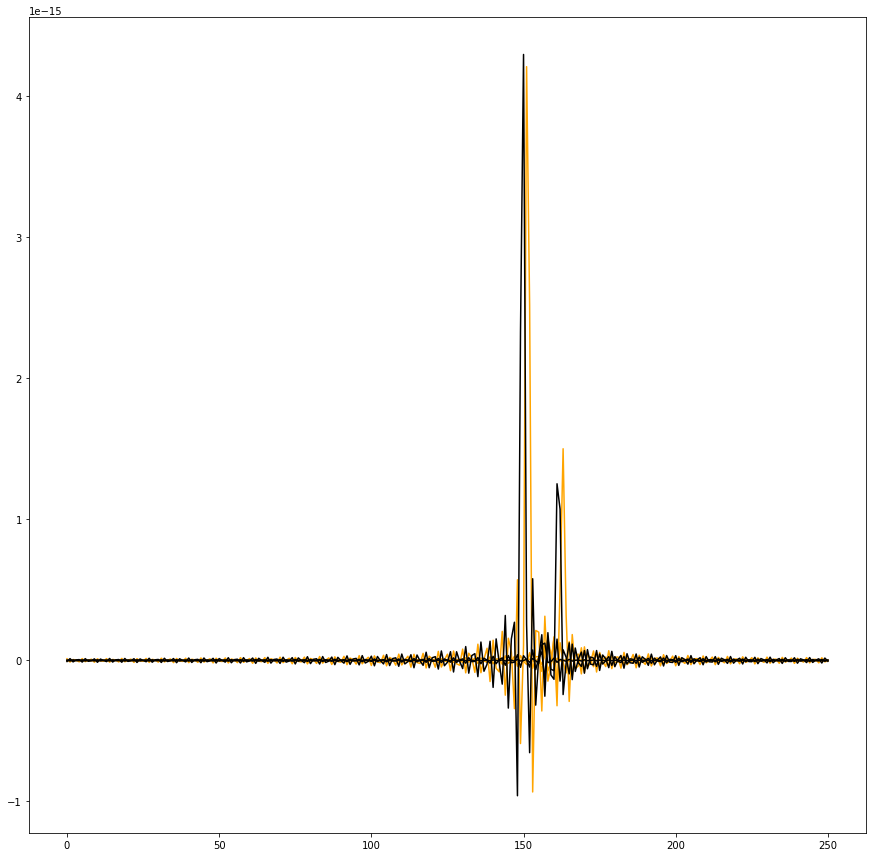

In [62]:
pl.figure(figsize=(15,15))
mods = fit['fitted_models']['Cm1LinesModel']
for imod in range(mods.shape[0]):
    if imod < 3: c='orange'
    else: c='black'
    pl.plot(mods[imod,:],c=c)


In [64]:
fit['velocity_gvar']
fit['logGBF']

309.11370465271671